In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
# Dataset load
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\angaj\AppData\Local\Temp\ipykernel_17896\1309195150.py:3: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
C:\Users\angaj\AppData\Local\Temp\ipykernel_17896\1309195150.py:3: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
raw_df.head()

In [143]:
# Feature every from original Boston dataset
columns_name = [
    "CRIM",    #per capita crime rate by town
    "ZN",       #proportion of residential land zoned for lots over 25,000 sq.ft.
    "INDUS",    #proportion of non-retail business acres per town
    "CHAS",     #Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    "NOX",     #nitric oxides concentration (parts per 10 million)
    "RM",       #average number of rooms per dwelling
    "AGE",      #proportion of owner-occupied units built prior to 1940
    "DIS",      #weighted distances to five Boston employment centres
    "RAD",     #index of accessibility to radial highways
    "TAX",      #full-value property-tax rate per $10,000
    "PTRATIO",  #pupil-teacher ratio by town
    "B",      #1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    "LSTAT"    #% lower status of the population
]

In [198]:
columns_name

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [145]:
len(columns_name)

13

In [199]:
# Create DataFrame
boston_df = pd.DataFrame(data, columns=columns_name)
boston_df["MEDV"] = target # MEDV: median value of owner-occupied homes in $1000's

# show sample
print(boston_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [200]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer

In [201]:
from sklearn.impute import SimpleImputer

In [202]:
from sklearn.feature_selection import mutual_info_regression

In [203]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [204]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [205]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [206]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [207]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

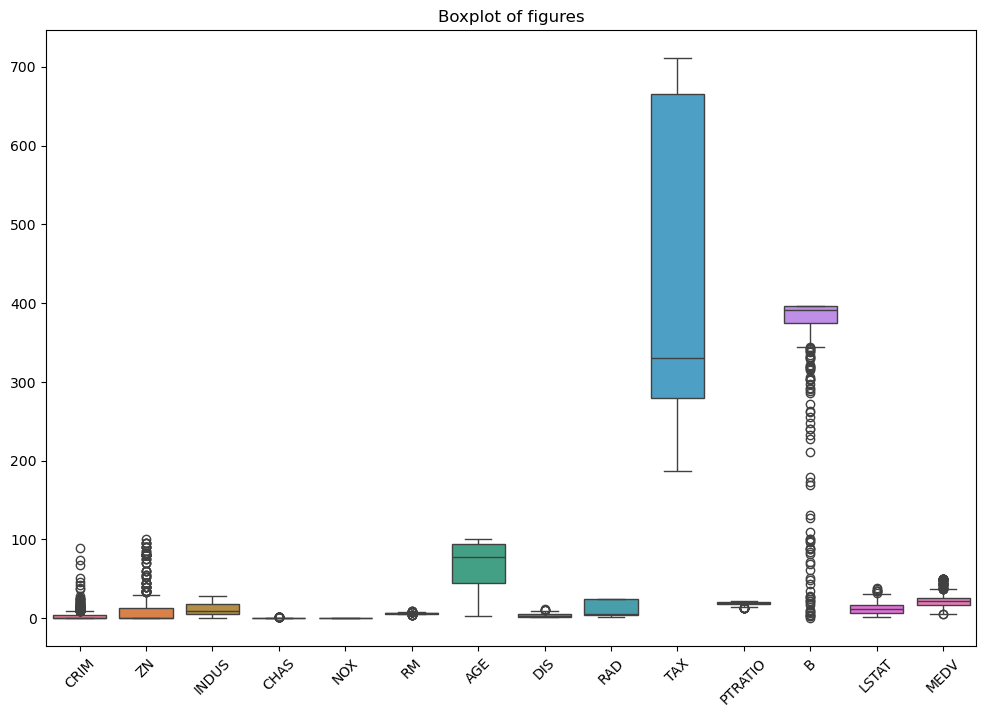

In [208]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=boston_df)
plt.xticks(rotation=45)
plt.title("Boxplot of figures")
plt.show()

In [209]:
for col in boston_df.columns:
    q1 = boston_df[col].quantile(0.25)
    q3 = boston_df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    boston_df[col] = np.where(boston_df[col] > upper, upper, np.where(boston_df[col] < lower, lower, boston_df[col]))

In [210]:
plt.figure(figsize = (22, 20))


<Figure size 2200x2000 with 0 Axes>

<Figure size 2200x2000 with 0 Axes>

<Axes: >

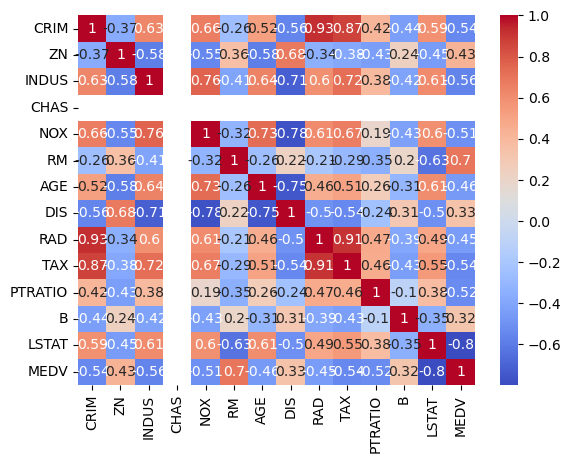

In [211]:
sns.heatmap(boston_df.corr(), annot = True, cmap = "coolwarm")

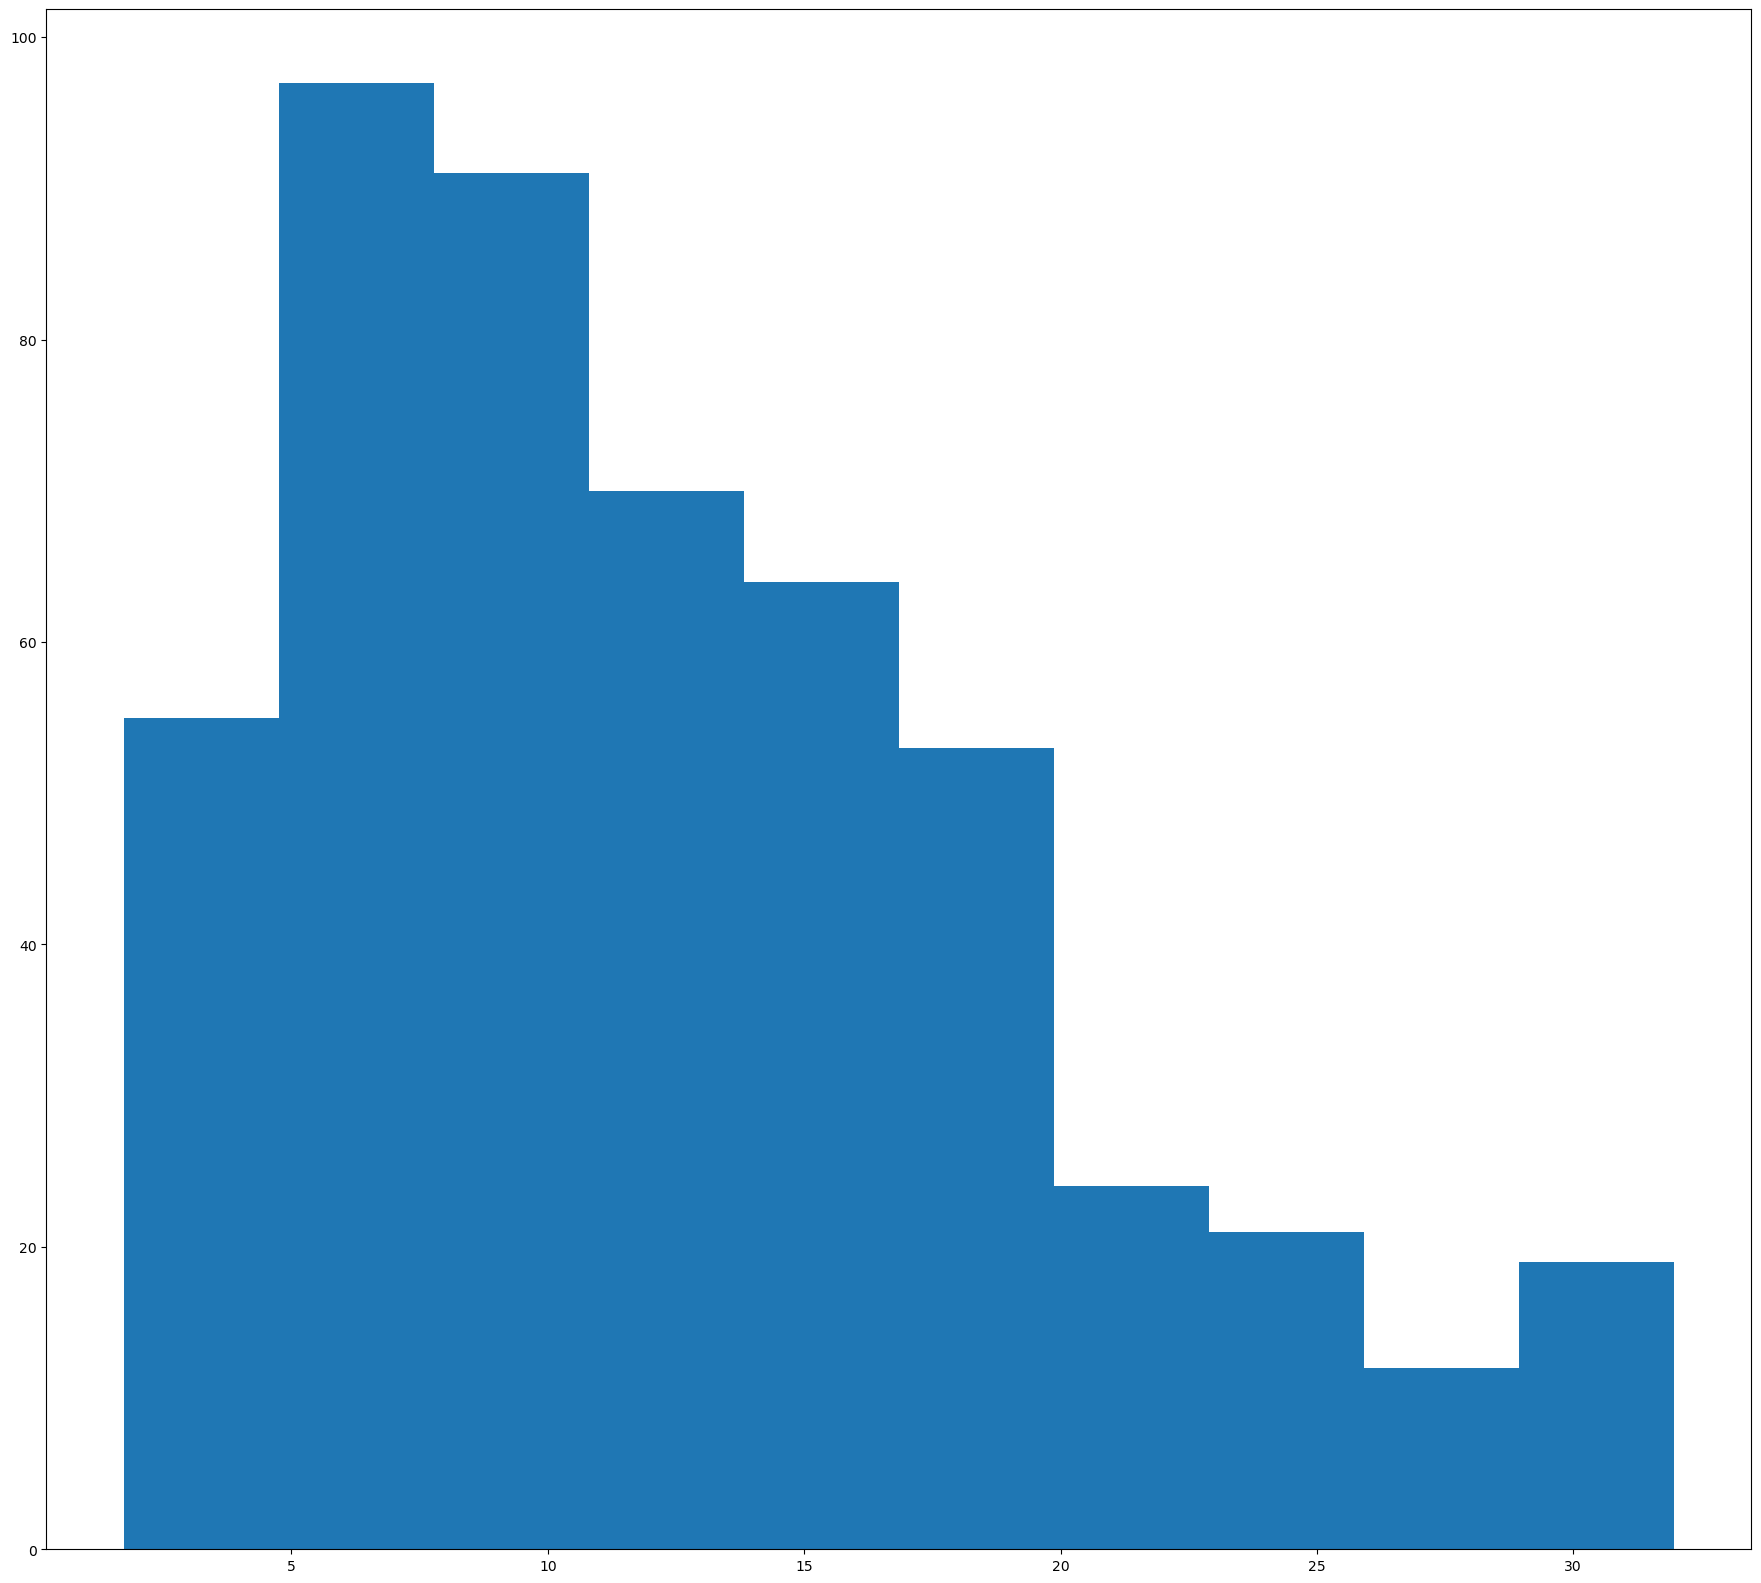

In [212]:
plt.figure(figsize=(22, 20))
plt.hist(boston_df["LSTAT"])
plt.show()

(array([ 12.,  24.,  54.,  57., 102., 106.,  41.,  31.,  25.,  54.]),
 array([ 5.0625,  8.2525, 11.4425, 14.6325, 17.8225, 21.0125, 24.2025,
        27.3925, 30.5825, 33.7725, 36.9625]),
 <BarContainer object of 10 artists>)

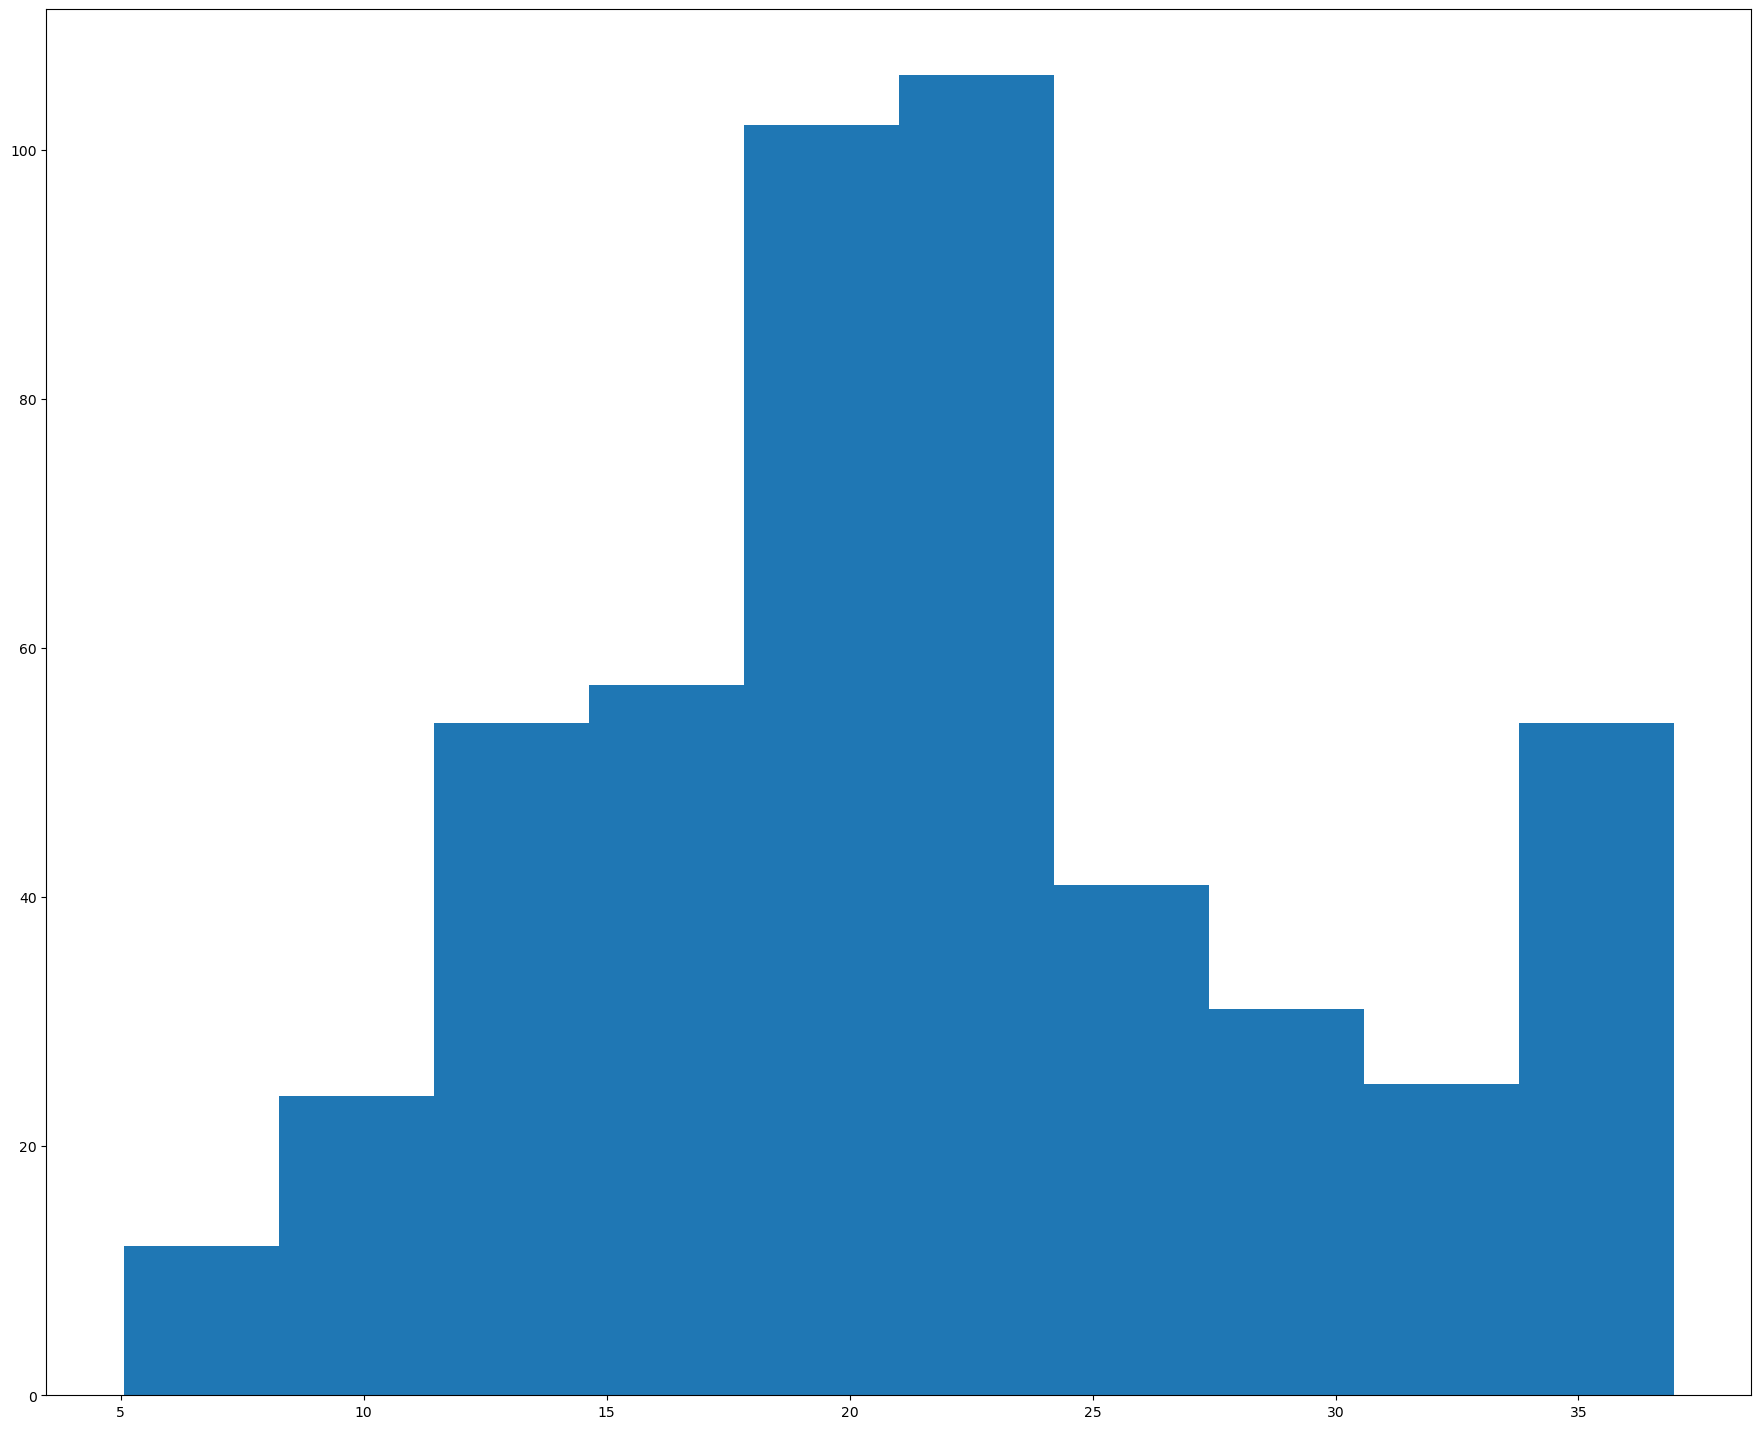

In [213]:
plt.figure(figsize=(22, 18))
plt.hist(boston_df["MEDV"])

In [214]:
boston_df["lstat_log"] = np.log1p(boston_df["LSTAT"])

In [215]:
boston_df["crim_log"] = np.log1p(boston_df["CRIM"])

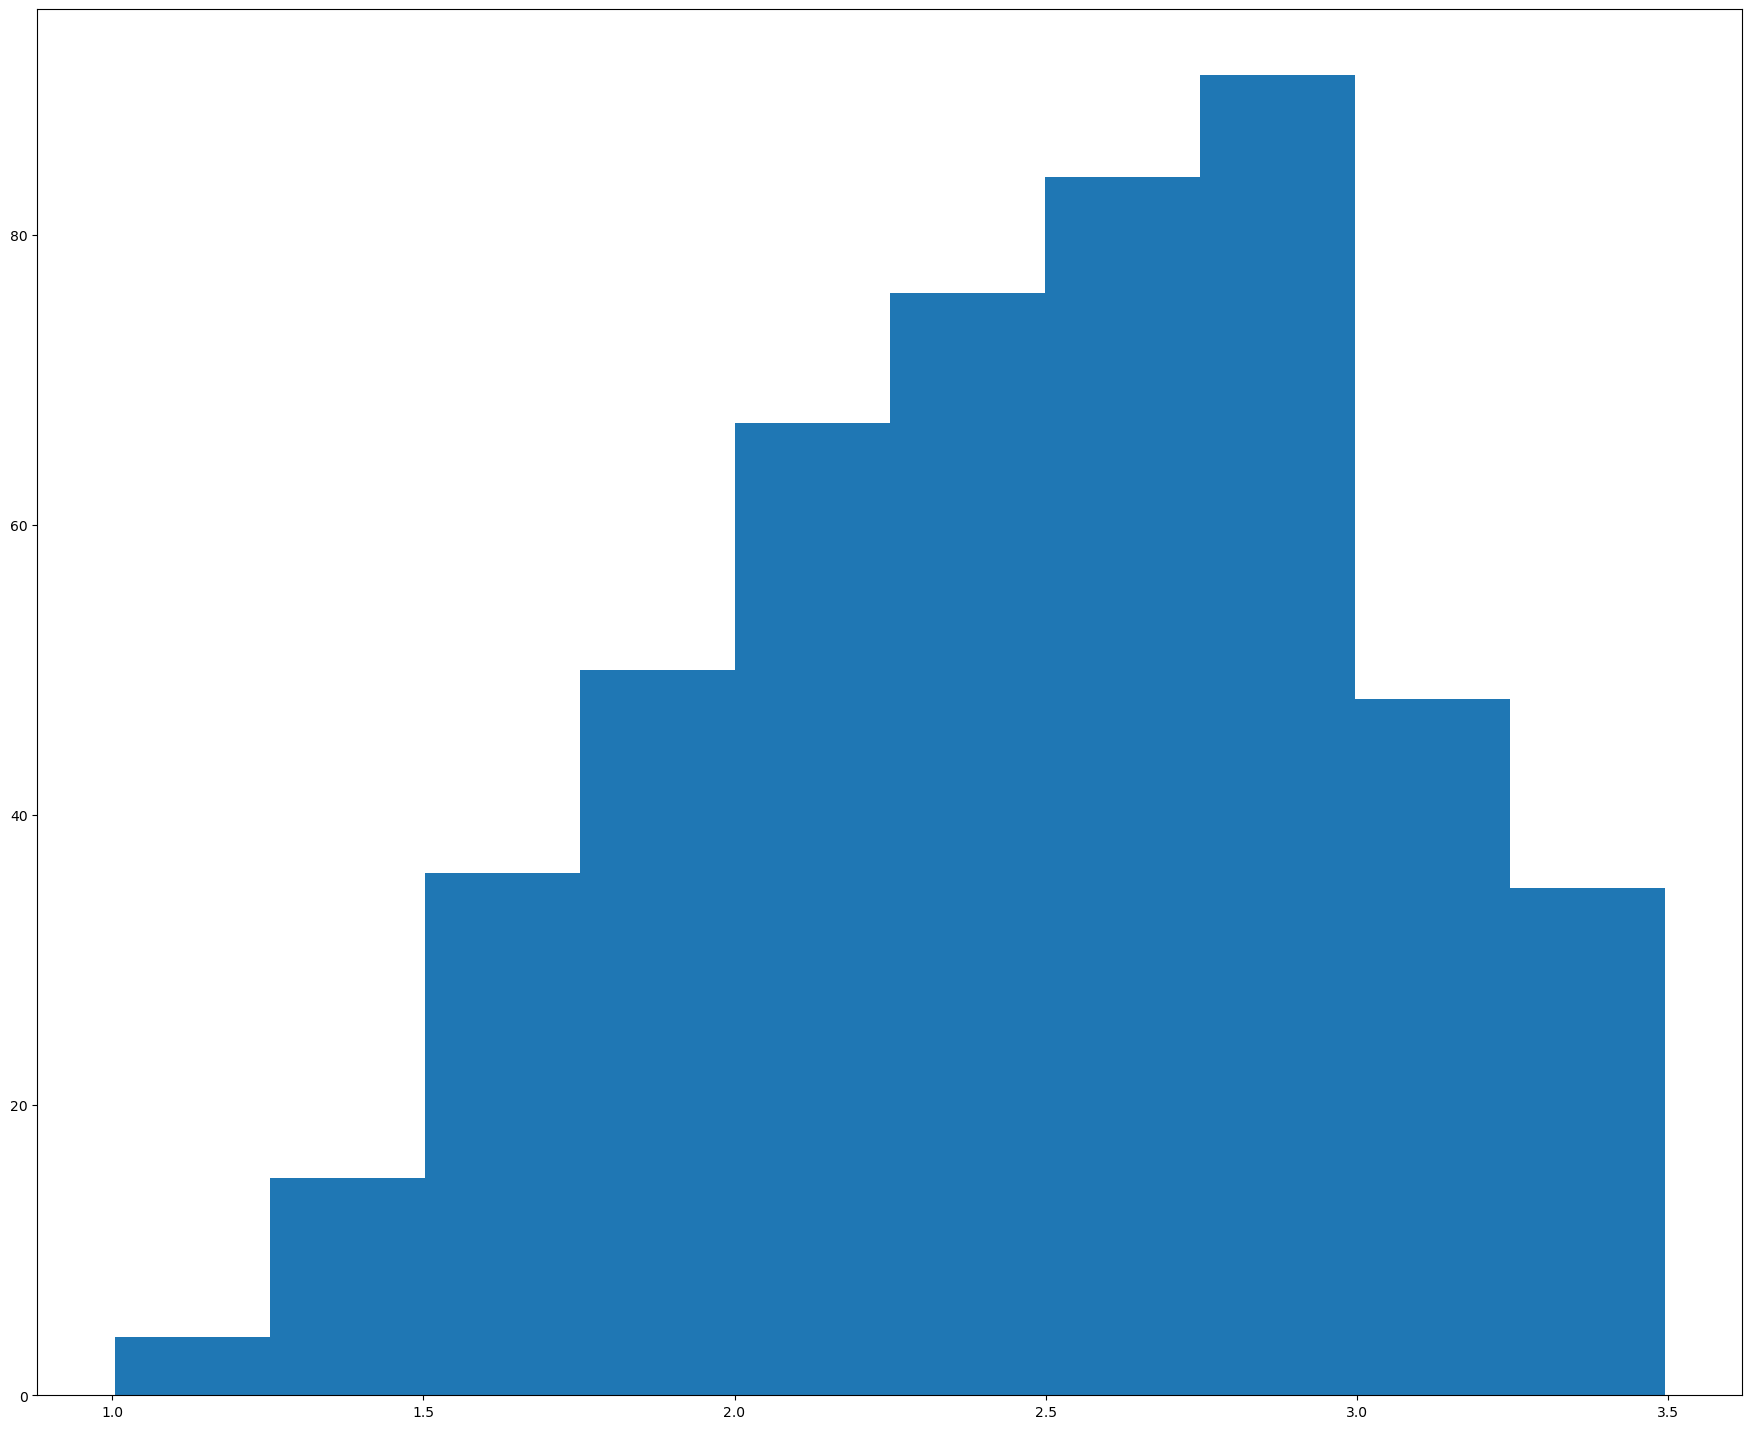

In [216]:
plt.figure(figsize= (22, 18))
plt.hist(boston_df["lstat_log"])
plt.show()

In [217]:
# Create nuw columns
boston_df["tax_per_room"] = boston_df["TAX"]/boston_df["RM"]

In [218]:
boston_df["age_cat"] = pd.cut(boston_df["AGE"], bins=[0, 35, 70, 100], labels=["New", "Mid", "Old"])

In [219]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,lstat_log,crim_log,tax_per_room,age_cat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1.788421,0.006300,45.019011,Mid
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,2.316488,0.026944,37.688834,Old
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1.615420,0.026924,33.681280,Mid
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1.371181,0.031857,31.723350,Mid
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1.845300,0.066770,31.061984,Mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,2.367436,0.060747,41.407553,Mid
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,2.310553,0.044275,44.607843,Old
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,1.893112,0.058986,39.134174,Old
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,2.012233,0.103991,40.182514,Old


In [244]:
boston_df = pd.get_dummies(boston_df, columns = ["age_cat"], drop_first=True)

In [222]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,lstat_log,crim_log,tax_per_room,age_cat_Mid,age_cat_Old
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1.788421,0.006300,45.019011,True,False
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,2.316488,0.026944,37.688834,False,True
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1.615420,0.026924,33.681280,True,False
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1.371181,0.031857,31.723350,True,False
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1.845300,0.066770,31.061984,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,2.367436,0.060747,41.407553,True,False
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,2.310553,0.044275,44.607843,False,True
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,1.893112,0.058986,39.134174,False,True
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,2.012233,0.103991,40.182514,False,True


In [224]:
scaler = StandardScaler()

In [225]:
# Drop >> MEDV columns
scaler_cols = boston_df.drop(columns = "MEDV").columns

In [226]:
scaler_cols

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'lstat_log', 'crim_log', 'tax_per_room',
       'age_cat_Mid', 'age_cat_Old'],
      dtype='object')

In [227]:
# Drop >> CRIM columns
scaler_cols = boston_df.drop(columns = "CRIM").columns

In [228]:
scaler_cols

Index(['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'lstat_log', 'crim_log',
       'tax_per_room', 'age_cat_Mid', 'age_cat_Old'],
      dtype='object')

In [229]:
boston_df[scaler_cols] = scaler.fit_transform(boston_df[scaler_cols])

In [230]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,lstat_log,crim_log,tax_per_room,age_cat_Mid,age_cat_Old
0,0.00632,0.918420,-1.287909,0.0,-0.144217,0.475982,-0.120013,0.148015,-0.982843,-0.666608,-1.477181,0.786988,-1.088749,0.279499,-1.279536,-0.850062,-0.707626,1.718466,-1.144772
1,0.02731,-0.579471,-0.593381,0.0,-0.740262,0.231390,0.367166,0.572202,-0.867883,-0.987329,-0.309941,0.786988,-0.495302,-0.036479,-0.294599,-0.826167,-0.948728,-0.581914,0.873537
2,0.02729,-0.579471,-0.593381,0.0,-0.740262,1.444822,-0.265812,0.572202,-0.867883,-0.987329,-0.309941,0.573183,-1.224272,1.688236,-1.602212,-0.826189,-1.080543,1.718466,-1.144772
3,0.03237,-0.579471,-1.306878,0.0,-0.835284,1.147817,-0.809889,1.101820,-0.752922,-1.106115,0.110265,0.667741,-1.379766,1.517081,-2.057761,-0.820479,-1.144942,1.718466,-1.144772
4,0.06905,-0.579471,-1.306878,0.0,-0.835284,1.384468,-0.511180,1.101820,-0.752922,-1.106115,0.110265,0.786988,-1.038819,1.885722,-1.173446,-0.780067,-1.166696,1.718466,-1.144772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,-0.579471,0.115738,0.0,0.158124,0.504571,0.018673,-0.631298,-0.982843,-0.803212,1.184126,0.529057,-0.419694,0.068847,-0.199572,-0.787039,-0.826413,1.718466,-1.144772
502,0.04527,-0.579471,0.115738,0.0,0.158124,-0.246676,0.288933,-0.723719,-0.982843,-0.803212,1.184126,0.786988,-0.503861,-0.168137,-0.305668,-0.806105,-0.721150,-0.581914,0.873537
503,0.06076,-0.579471,0.115738,0.0,0.158124,1.112875,0.797449,-0.781754,-0.982843,-0.803212,1.184126,0.786988,-0.994596,0.266333,-1.084269,-0.789078,-0.901188,-0.581914,0.873537
504,0.10959,-0.579471,0.115738,0.0,0.158124,0.823812,0.736996,-0.674679,-0.982843,-0.803212,1.184126,0.605753,-0.874765,0.016184,-0.862088,-0.736984,-0.866706,-0.581914,0.873537


In [231]:
# Remove >> LSTAT CRIM Columns.
boston_df = boston_df.drop(columns = ["LSTAT", "CRIM"])

In [232]:
boston_df

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,MEDV,lstat_log,crim_log,tax_per_room,age_cat_Mid,age_cat_Old
0,0.918420,-1.287909,0.0,-0.144217,0.475982,-0.120013,0.148015,-0.982843,-0.666608,-1.477181,0.786988,0.279499,-1.279536,-0.850062,-0.707626,1.718466,-1.144772
1,-0.579471,-0.593381,0.0,-0.740262,0.231390,0.367166,0.572202,-0.867883,-0.987329,-0.309941,0.786988,-0.036479,-0.294599,-0.826167,-0.948728,-0.581914,0.873537
2,-0.579471,-0.593381,0.0,-0.740262,1.444822,-0.265812,0.572202,-0.867883,-0.987329,-0.309941,0.573183,1.688236,-1.602212,-0.826189,-1.080543,1.718466,-1.144772
3,-0.579471,-1.306878,0.0,-0.835284,1.147817,-0.809889,1.101820,-0.752922,-1.106115,0.110265,0.667741,1.517081,-2.057761,-0.820479,-1.144942,1.718466,-1.144772
4,-0.579471,-1.306878,0.0,-0.835284,1.384468,-0.511180,1.101820,-0.752922,-1.106115,0.110265,0.786988,1.885722,-1.173446,-0.780067,-1.166696,1.718466,-1.144772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.579471,0.115738,0.0,0.158124,0.504571,0.018673,-0.631298,-0.982843,-0.803212,1.184126,0.529057,0.068847,-0.199572,-0.787039,-0.826413,1.718466,-1.144772
502,-0.579471,0.115738,0.0,0.158124,-0.246676,0.288933,-0.723719,-0.982843,-0.803212,1.184126,0.786988,-0.168137,-0.305668,-0.806105,-0.721150,-0.581914,0.873537
503,-0.579471,0.115738,0.0,0.158124,1.112875,0.797449,-0.781754,-0.982843,-0.803212,1.184126,0.786988,0.266333,-1.084269,-0.789078,-0.901188,-0.581914,0.873537
504,-0.579471,0.115738,0.0,0.158124,0.823812,0.736996,-0.674679,-0.982843,-0.803212,1.184126,0.605753,0.016184,-0.862088,-0.736984,-0.866706,-0.581914,0.873537


In [233]:
boston_df["tax_per_room"] = boston_df["TAX"]/boston_df["RM"]

In [234]:
boston_df["age_cat"] = pd.cut(boston_df["AGE"], bins=[0, 35, 70, 100], labels=["New", "Mid", "Old"])

In [235]:
boston_df

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,MEDV,lstat_log,crim_log,tax_per_room,age_cat_Mid,age_cat_Old,age_cat
0,0.918420,-1.287909,0.0,-0.144217,0.475982,-0.120013,0.148015,-0.982843,-0.666608,-1.477181,0.786988,0.279499,-1.279536,-0.850062,-1.400489,1.718466,-1.144772,NaN
1,-0.579471,-0.593381,0.0,-0.740262,0.231390,0.367166,0.572202,-0.867883,-0.987329,-0.309941,0.786988,-0.036479,-0.294599,-0.826167,-4.266946,-0.581914,0.873537,New
2,-0.579471,-0.593381,0.0,-0.740262,1.444822,-0.265812,0.572202,-0.867883,-0.987329,-0.309941,0.573183,1.688236,-1.602212,-0.826189,-0.683357,1.718466,-1.144772,NaN
3,-0.579471,-1.306878,0.0,-0.835284,1.147817,-0.809889,1.101820,-0.752922,-1.106115,0.110265,0.667741,1.517081,-2.057761,-0.820479,-0.963669,1.718466,-1.144772,NaN
4,-0.579471,-1.306878,0.0,-0.835284,1.384468,-0.511180,1.101820,-0.752922,-1.106115,0.110265,0.786988,1.885722,-1.173446,-0.780067,-0.798946,1.718466,-1.144772,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.579471,0.115738,0.0,0.158124,0.504571,0.018673,-0.631298,-0.982843,-0.803212,1.184126,0.529057,0.068847,-0.199572,-0.787039,-1.591870,1.718466,-1.144772,New
502,-0.579471,0.115738,0.0,0.158124,-0.246676,0.288933,-0.723719,-0.982843,-0.803212,1.184126,0.786988,-0.168137,-0.305668,-0.806105,3.256135,-0.581914,0.873537,New
503,-0.579471,0.115738,0.0,0.158124,1.112875,0.797449,-0.781754,-0.982843,-0.803212,1.184126,0.786988,0.266333,-1.084269,-0.789078,-0.721745,-0.581914,0.873537,New
504,-0.579471,0.115738,0.0,0.158124,0.823812,0.736996,-0.674679,-0.982843,-0.803212,1.184126,0.605753,0.016184,-0.862088,-0.736984,-0.974994,-0.581914,0.873537,New


In [238]:
# Feature selection
x = boston_df.drop(columns = ["MEDV"])


In [239]:
y = boston_df["MEDV"]

In [240]:
mi = mutual_info_regression(x,y)

ValueError: Input contains NaN

In [188]:
mi_series = pd.Series(mi,index = x.columns).sort_values(asending = False)

NameError: name 'mi' is not defined

In [241]:
mi_series = pd.Series(mi, index = x.columns).sort_values(ascending = False)

NameError: name 'mi' is not defined